In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\venna\OneDrive\Pictures\Documents\DATA_SETS\Amazon Sales data (1).csv")

In [3]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [4]:
df.shape

(100, 14)

In [5]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
df.loc[df.duplicated()]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
df['Item Type'].value_counts()

Item Type
Cosmetics          13
Clothes            13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Cereal              7
Baby Food           7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [9]:
data = df

In [10]:
data['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

In [11]:
grouped_data = data.groupby(by=['Region','Country'])['Total Revenue'].sum().reset_index()
grouped_data

,Region,Country,Total Revenue
0,Asia,Bangladesh,902980.64
1,Asia,Brunei,4368316.68
2,Asia,Kyrgyzstan,19103.44
3,Asia,Laos,574951.92
4,Asia,Malaysia,58471.11
...,...,...,...
71,Sub-Saharan Africa,Senegal,1356180.10
72,Sub-Saharan Africa,Sierra Leone,3097359.15
73,Sub-Saharan Africa,South Sudan,173676.25
74,Sub-Saharan Africa,The Gambia,5449517.95


In [12]:
max_revenue = grouped_data['Total Revenue'].max()
min_revenue = grouped_data['Total Revenue'].min()
ans1 = grouped_data.loc[grouped_data['Total Revenue']==max_revenue,['Region','Country']]
ans2 = grouped_data.loc[grouped_data['Total Revenue']==min_revenue,['Region','Country']]
ans1


,Region,Country
22,Central America and the Caribbean,Honduras


In [13]:
ans2

,Region,Country
45,Middle East and North Africa,Kuwait


In [14]:
grouped_data = data.groupby(by=['Region'])['Total Profit'].sum().reset_index()
grouped_data

,Region,Total Profit
0,Asia,6113845.87
1,Australia and Oceania,4722160.03
2,Central America and the Caribbean,2846907.85
3,Europe,11082938.63
4,Middle East and North Africa,5761191.86
5,North America,1457942.76
6,Sub-Saharan Africa,12183211.40


In [15]:
max_profit = grouped_data['Total Profit'].max()
min_profit = grouped_data['Total Profit'].min()
ans1 = grouped_data.loc[grouped_data['Total Profit']==max_profit,'Region']
ans2 = grouped_data.loc[grouped_data['Total Profit']==min_profit,'Region']
ans1

6    Sub-Saharan Africa
Name: Region, dtype: object

In [16]:
ans2

5    North America
Name: Region, dtype: object

In [17]:
grouped_data = data.groupby(by='Item Type')['Units Sold'].sum().reset_index()
grouped_data

,Item Type,Units Sold
0,Baby Food,40545
1,Beverages,56708
2,Cereal,25877
3,Clothes,71260
4,Cosmetics,83718
5,Fruits,49998
6,Household,44727
7,Meat,10675
8,Office Supplies,46967
9,Personal Care,48708


In [18]:
max_sold = grouped_data['Units Sold'].max()
min_sold = grouped_data['Units Sold'].min()
ans1 = grouped_data.loc[grouped_data['Units Sold']==max_sold,'Item Type']
ans2 = grouped_data.loc[grouped_data['Units Sold']==min_sold,'Item Type']
ans1
 

4    Cosmetics
Name: Item Type, dtype: object

In [19]:
ans2

7    Meat
Name: Item Type, dtype: object

In [20]:
grouped_data = data.groupby(by=['Region','Item Type'])['Units Sold'].sum().reset_index()
grouped_data.head()

,Region,Item Type,Units Sold
0,Asia,Clothes,14193
1,Asia,Cosmetics,6952
2,Asia,Fruits,6267
3,Asia,Household,12080
4,Asia,Office Supplies,11718


In [21]:
s = set()
for x in grouped_data['Region']:
    s.add(x)
print(s)

{'Asia', 'Middle East and North Africa', 'Europe', 'North America', 'Sub-Saharan Africa', 'Australia and Oceania', 'Central America and the Caribbean'}


In [22]:
for x in s:
    max_item = grouped_data.loc[grouped_data['Region']==x,'Units Sold' ].max()
    ans = grouped_data.loc[(grouped_data['Region']==x) & (grouped_data['Units Sold']==max_item),'Item Type']
    print(f"Region: {x}, Item Type(s): {list(ans)}")

Region: Asia, Item Type(s): ['Clothes']
Region: Middle East and North Africa, Item Type(s): ['Cosmetics']
Region: Europe, Item Type(s): ['Cosmetics']
Region: North America, Item Type(s): ['Personal Care']
Region: Sub-Saharan Africa, Item Type(s): ['Fruits']
Region: Australia and Oceania, Item Type(s): ['Beverages']
Region: Central America and the Caribbean, Item Type(s): ['Household']


In [23]:
grouped_data = data.groupby(by=['Item Type','Sales Channel'])['Units Sold'].sum().reset_index()
grouped_data

,Item Type,Sales Channel,Units Sold
0,Baby Food,Offline,24098
1,Baby Food,Online,16447
2,Beverages,Offline,41588
3,Beverages,Online,15120
4,Cereal,Offline,3761
5,Cereal,Online,22116
6,Clothes,Offline,40871
7,Clothes,Online,30389
8,Cosmetics,Offline,41749
9,Cosmetics,Online,41969


In [24]:
s1 = set()
for item in grouped_data['Item Type']:
    s1.add(item)
print(s1)

{'Fruits', 'Beverages', 'Office Supplies', 'Personal Care', 'Household', 'Vegetables', 'Clothes', 'Baby Food', 'Cereal', 'Cosmetics', 'Snacks', 'Meat'}


In [25]:
for x in s1:
    online_sold = grouped_data.loc[(grouped_data['Item Type']==x) & (grouped_data['Sales Channel']=='Online'),'Units Sold'].sum()
    offline_sold = grouped_data.loc[(grouped_data['Item Type']==x) & (grouped_data['Sales Channel']=='Offline'),'Units Sold'].sum()
    if(online_sold > offline_sold):
        print(f"{x} sold better in online mode")
    else:
        print(f"{x} sold better in offline mode")

Fruits sold better in online mode
Beverages sold better in offline mode
Office Supplies sold better in online mode
Personal Care sold better in offline mode
Household sold better in offline mode
Vegetables sold better in online mode
Clothes sold better in offline mode
Baby Food sold better in offline mode
Cereal sold better in online mode
Cosmetics sold better in online mode
Snacks sold better in online mode
Meat sold better in online mode


In [26]:


grouped_data = data.groupby(by=['Item Type','Units Sold'])['Total Revenue'].sum().reset_index()
grouped_data

,Item Type,Units Sold,Total Revenue
0,Baby Food,1273,324971.44
1,Baby Food,2974,759202.72
2,Baby Food,4750,1212580.00
3,Baby Food,5559,1419101.52
4,Baby Food,7450,1901836.00
...,...,...,...
95,Vegetables,171,26344.26
96,Vegetables,1485,228779.10
97,Vegetables,3732,574951.92
98,Vegetables,6457,994765.42


In [27]:
for x in s1:
    units_sold = grouped_data.loc[(grouped_data['Item Type']==x),'Units Sold'].sum()
    total_revenue = grouped_data.loc[(grouped_data['Item Type']==x),'Total Revenue'].sum()
    profit_per_unit = total_revenue/units_sold
    print(f"for {x}, profit per unit is {profit_per_unit:.2f}") 

for Fruits, profit per unit is 9.33
for Beverages, profit per unit is 47.45
for Office Supplies, profit per unit is 651.21
for Personal Care, profit per unit is 81.73
for Household, profit per unit is 668.27
for Vegetables, profit per unit is 154.06
for Clothes, profit per unit is 109.28
for Baby Food, profit per unit is 255.28
for Cereal, profit per unit is 205.70
for Cosmetics, profit per unit is 437.20
for Snacks, profit per unit is 152.58
for Meat, profit per unit is 421.89


In [28]:
grouped_data = data.groupby(by='Item Type')['Total Revenue'].sum().reset_index()
grouped_data

,Item Type,Total Revenue
0,Baby Food,10350327.60
1,Beverages,2690794.60
2,Cereal,5322898.90
3,Clothes,7787292.80
4,Cosmetics,36601509.60
5,Fruits,466481.34
6,Household,29889712.29
7,Meat,4503675.75
8,Office Supplies,30585380.07
9,Personal Care,3980904.84


In [29]:
best_item = grouped_data.loc[grouped_data['Total Revenue']==grouped_data['Total Revenue'].max(),'Item Type']
best_item

4    Cosmetics
Name: Item Type, dtype: object

In [30]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Quarter'] = data['Order Date'].dt.quarter

data[['Order Date','Year','Month','Quarter']].head()

,Order Date,Year,Month,Quarter
0,2010-05-28,2010,5,2
1,2012-08-22,2012,8,3
2,2014-05-02,2014,5,2
3,2014-06-20,2014,6,2
4,2013-02-01,2013,2,1


In [31]:
monthly_sales = data.groupby(by=['Year','Month'])['Units Sold'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str)+'-'+monthly_sales['Month'].astype(str).str.zfill(2)
monthly_sales.head()

,Year,Month,Units Sold,Year-Month
0,2010,2,9503,2010-02
1,2010,5,15747,2010-05
2,2010,6,9905,2010-06
3,2010,10,14403,2010-10
4,2010,11,7910,2010-11


Text(0, 0.5, 'Units Sold')

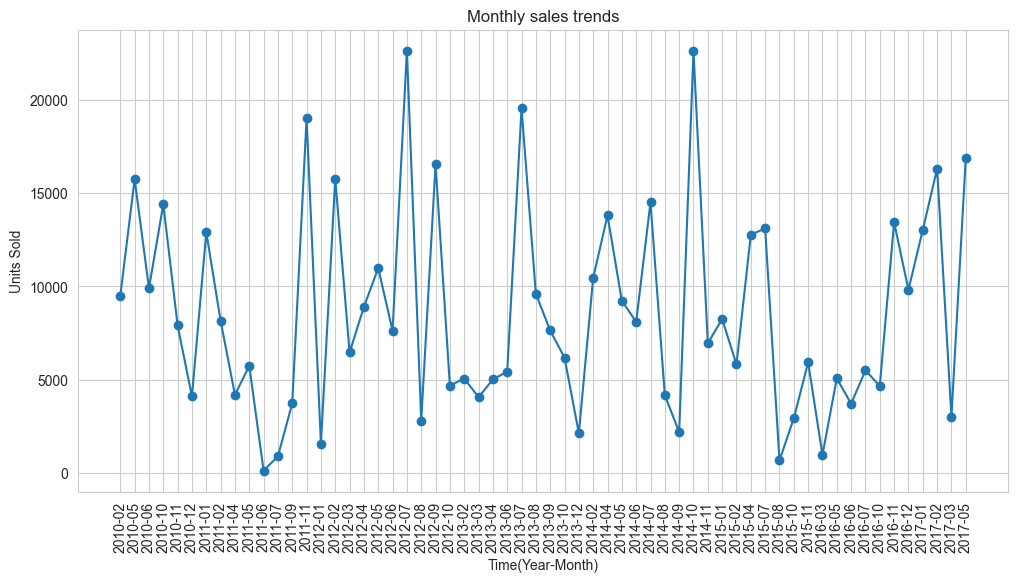

In [32]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.plot(monthly_sales['Year-Month'],monthly_sales['Units Sold'],marker='o')
plt.xticks(rotation=90)
plt.title('Monthly sales trends')
plt.xlabel('Time(Year-Month)')
plt.ylabel('Units Sold')

In [33]:
monthly_sales_by_item = data.groupby(by=['Item Type','Year','Month'])['Units Sold'].sum().reset_index()
monthly_sales_by_item['Year-Month'] = monthly_sales_by_item['Year'].astype(str)+'-'+monthly_sales_by_item['Month'].astype(str).str.zfill(2)
monthly_sales_by_item.head()

,Item Type,Year,Month,Units Sold,Year-Month
0,Baby Food,2010,5,9925,2010-05
1,Baby Food,2012,5,8614,2012-05
2,Baby Food,2013,6,4750,2013-06
3,Baby Food,2014,2,5559,2014-02
4,Baby Food,2014,5,7450,2014-05


Text(0, 0.5, 'Units Sold')

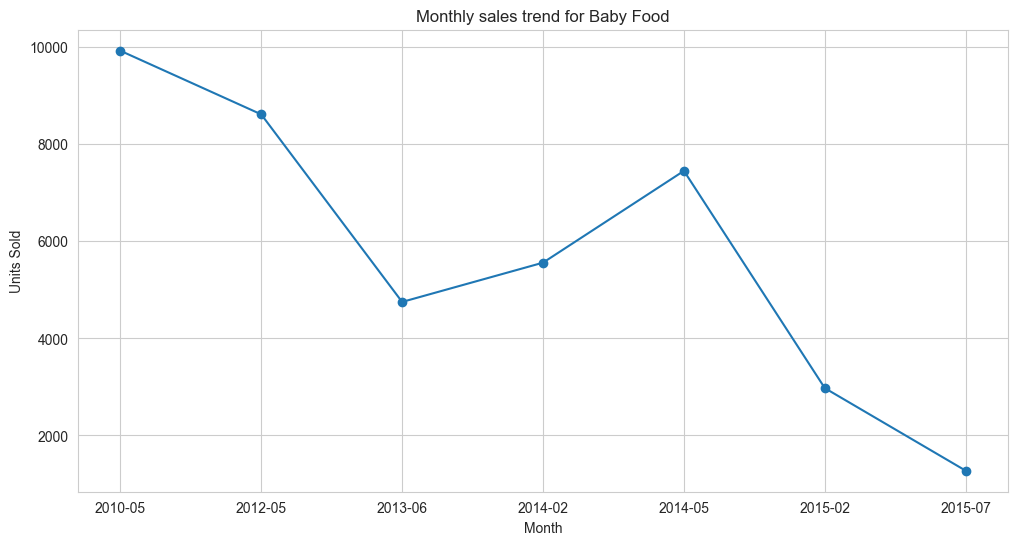

In [34]:
filer_sales = monthly_sales_by_item.loc[monthly_sales_by_item['Item Type']=='Baby Food']
plt.figure(figsize=(12,6))
plt.plot(filer_sales['Year-Month'],filer_sales['Units Sold'],marker='o')
plt.title("Monthly sales trend for Baby Food")
plt.xlabel("Month")
plt.ylabel("Units Sold")

In [35]:
peak_sales = monthly_sales_by_item.loc[monthly_sales_by_item.groupby(by='Item Type')['Units Sold'].idxmax()]
peak_sales

,Item Type,Year,Month,Units Sold,Year-Month
0,Baby Food,2010,5,9925,2010-05
10,Beverages,2014,7,14513,2014-07
20,Cereal,2017,5,8656,2017-05
22,Clothes,2010,6,9905,2010-06
37,Cosmetics,2013,7,19546,2013-07
45,Fruits,2011,11,10051,2011-11
61,Household,2017,2,8974,2017-02
62,Meat,2012,7,5908,2012-07
65,Office Supplies,2011,11,8975,2011-11
80,Personal Care,2015,7,11837,2015-07


In [36]:
peak_sales_rgn = data.groupby(by=['Region','Year','Month'])['Units Sold'].sum().reset_index()
peak_sales = data.loc[peak_sales_rgn.groupby(by=['Region'])['Units Sold'].idxmax()]
peak_sales

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Quarter
10,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,7/12/2011,124,154.06,90.93,19103.44,11275.32,7828.12,2011,6,2
18,Asia,Turkmenistan,Household,Offline,L,2010-12-30,441619336,1/20/2011,3830,668.27,502.54,2559474.10,1924728.20,634745.90,2010,12,4
26,Australia and Oceania,Kiribati,Fruits,Online,M,2014-10-13,347140347,11/10/2014,5398,9.33,6.92,50363.34,37354.16,13009.18,2014,10,4
39,Europe,Bulgaria,Office Supplies,Online,M,2012-02-16,189965903,2/28/2012,3987,651.21,524.96,2596374.27,2093015.52,503358.75,2012,2,1
55,Sub-Saharan Africa,Cote d'Ivoire,Clothes,Online,C,2012-06-08,114606559,6/27/2012,3482,109.28,35.84,380512.96,124794.88,255718.08,2012,6,2
59,Sub-Saharan Africa,Djibouti,Cosmetics,Offline,H,2014-04-07,259353148,4/19/2014,7215,437.20,263.33,3154398.00,1899925.95,1254472.05,2014,4,2
72,Sub-Saharan Africa,Democratic Republic of the Congo,Beverages,Online,C,2011-05-26,585920464,7/15/2011,5741,47.45,31.79,272410.45,182506.39,89904.06,2011,5,2


In [37]:
pivot_data = monthly_sales_by_item.pivot_table(index='Year-Month',columns='Item Type',values='Units Sold',aggfunc='sum').fillna(0)
pivot_data.head()

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Year-Month,,,,,,,,,,,,
2010-02,0.0,0.0,0.0,2269.0,7234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05,9925.0,0.0,0.0,0.0,0.0,5822.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06,0.0,0.0,0.0,9905.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-10,0.0,0.0,0.0,6116.0,0.0,0.0,0.0,0.0,8287.0,0.0,0.0,0.0
2010-11,0.0,0.0,0.0,0.0,7910.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Item Type', ylabel='Year-Month'>

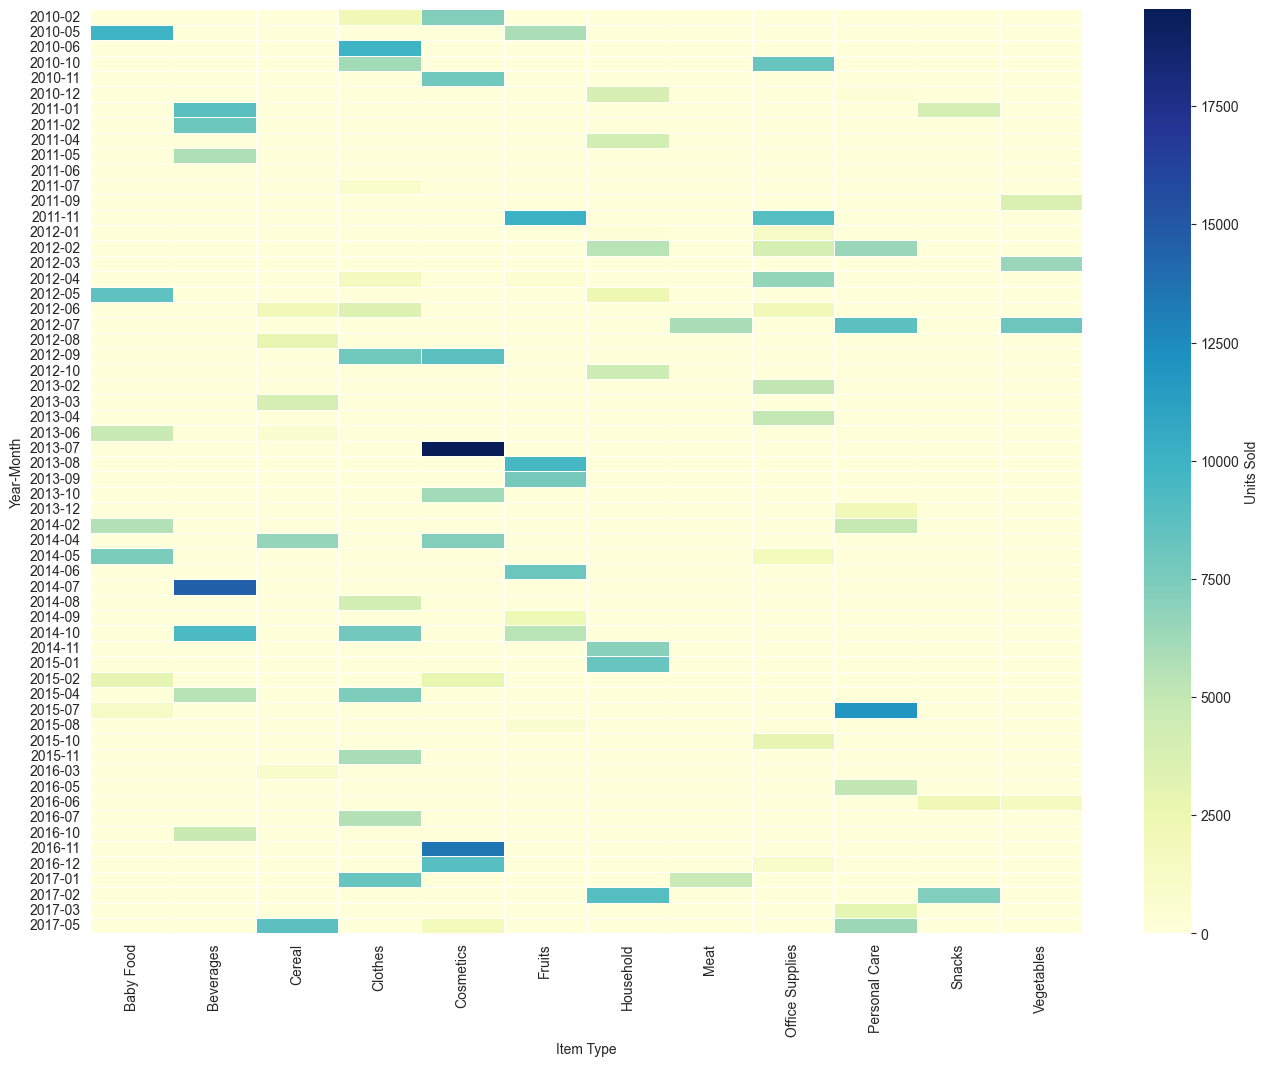

In [38]:
plt.figure(figsize=(16,12))
sns.heatmap(pivot_data,
            cmap="YlGnBu",
            annot=False,
            fmt='.0f',
            linewidths=0.5,
            cbar_kws={'label':'Units Sold'})

In [39]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [40]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Quarter
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,3
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2


In [41]:
df1 = data

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

In [43]:
df1['days'] = (df1['Ship Date'] - df1['Order Date']).dt.days
df1.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Quarter,days
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2,30
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,3,24
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,6


In [44]:
encoder = LabelEncoder()
df1['Region'] = encoder.fit_transform(df1['Region'])
df1['Country'] = encoder.fit_transform(df1['Country'])
df1['Item Type'] = encoder.fit_transform(df1['Item Type'])
df1['Sales Channel'] = encoder.fit_transform(df1['Sales Channel'])
df1['Order Priority'] = encoder.fit_transform(df1['Order Priority'])


In [45]:
df1.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Quarter,days
0,1,73,0,0,1,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2,30
1,2,22,2,1,0,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,3,24
2,3,55,8,0,2,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,6
3,6,59,5,1,0,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2,15
4,6,56,8,0,2,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,5


In [46]:
X = df1.drop(columns=['Total Revenue','Order Date','Ship Date'])
y = df1['Total Revenue']

mi_scores = mutual_info_regression(X,y)
mi_scores_data = {
    'features' : X.columns,
    'Scores' : mi_scores
}
mi_scores_df = pd.DataFrame(mi_scores_data)
mi_scores_df.sort_values(by='Scores',ascending=False)

,features,Scores
9,Total Cost,2.014014
10,Total Profit,1.529754
7,Unit Price,0.673015
8,Unit Cost,0.640187
2,Item Type,0.580318
6,Units Sold,0.335706
13,Quarter,0.032424
1,Country,0.032154
5,Order ID,0.011582
0,Region,0.000000


In [47]:
selected_features = ['Total Cost','Total Profit','Unit Price','Unit Cost','Item Type','Units Sold']
X = df1[selected_features]
y = df1['Total Revenue']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = RandomForestRegressor(n_estimators=100,random_state=42)
report = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score : {r2}")
print(f"mean squared error : {mse}")
print(f"mean absolute error : {mae}")

R2 score : 0.9910039431773082
mean squared error : 17538831839.544437
mean absolute error : 84206.43891666677


In [89]:
import random
ind = random.randint(0,len(X_test)-1)
test_value = X_test.iloc[ind,:].values.reshape(1,-1)
actual_value = y_test.iloc[ind]
pred_value = model.predict(test_value)
error = abs(actual_value-pred_value[0])
print(f"error for the prediction : {error}")

error for the prediction : 4315.780799999833


c:\Users\venna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


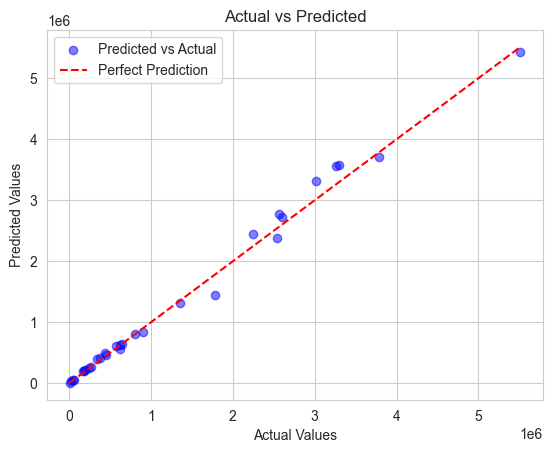

In [57]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


(30,)

(30, 6)
(30,)
